# Assignment 3

In this assigment, we will work with the *Forest Fire* data set. Please download the data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/162/forest+fires). Extract the data files into the subdirectory: `../data/fires/` (relative to `./src/`).

## Objective

+ The model objective is to predict the area affected by forest fires given the features set. 
+ The objective of this exercise is to assess your ability to construct and evaluate model pipelines.
+ Please note: the instructions are not meant to be 100% prescriptive, but instead they are a set of minimum requirements. If you find predictive performance gains by applying additional steps, by all means show them. 

## Variable Description

From the description file contained in the archive (`forestfires.names`), we obtain the following variable descriptions:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 









### Specific Tasks

+ Construct four model pipelines, out of combinations of the following components:

    + Preprocessors:

        - A simple processor that only scales numeric variables and recodes categorical variables.
        - A transformation preprocessor that scales numeric variables and applies a non-linear transformation.
    
    + Regressor:

        - A baseline regressor, which could be a [K-nearest neighbours model](https://open.spotify.com/track/4R3AU2pjv8ge2siX1fVbZs?si=b2712f32da0e4358) or a simple [linear regression model](https://scikit-learn.org/stable/modules/linear_model.html)
        - An advanced regressor of your choice (e.g., Random Forest, Neural Network, etc.)

+ Evaluate tune and evaluate each of the four model pipelines. 

    - Select a [performance metric](https://scikit-learn.org/stable/modules/linear_model.html) out of the following options: explained variance, max error, root mean squared error (RMSE), mean absolute error (MAE), r-squared.
    - *TIPS*: 
    
        * Out of the suggested metrics above, [some are correlation metrics, but this is a prediction problem](https://www.tmwr.org/performance#performance). Choose wisely (and don't choose the incorrect options.) 

+ Select the best-performing model and explain its predictions.

    - Provide local explanations.
    - Obtain global explanations and recommend a variable selection strategy.

+ Export your model as a pickle file.


You can work on the Jupyter notebook, as this experiment is fairly short (no need to use sacred). 

# Load the data

Assuming that the files `adult.data` and `adult.test` are in `../data/adult/`, then you can use the code below to load them.

In [1]:
import pandas as pd
import os

data_path = '../../05_src/data/fires/forestfires.csv'

# Check if the file exists
if os.path.exists(data_path):
    print("File exists")
else:
    print(f"File not found at path: {data_path}")

if os.path.exists(data_path):
    columns = [
        'coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area' 
    ]
    
    fires_dt = pd.read_csv(data_path, header=1, names=columns)
    
    print(fires_dt.head())
else:
    print(f"File not found at path: {data_path}")






File exists
   coord_x  coord_y month  day  ffmc   dmc     dc   isi  temp  rh  wind  rain  \
0        7        4   oct  tue  90.6  35.4  669.1   6.7  18.0  33   0.9   0.0   
1        7        4   oct  sat  90.6  43.7  686.9   6.7  14.6  33   1.3   0.0   
2        8        6   mar  fri  91.7  33.3   77.5   9.0   8.3  97   4.0   0.2   
3        8        6   mar  sun  89.3  51.3  102.2   9.6  11.4  99   1.8   0.0   
4        8        6   aug  sun  92.3  85.3  488.0  14.7  22.2  29   5.4   0.0   

   area  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  


# Get X and Y

Create the features data frame and target data.

In [2]:

# Assuming 'area' is the target variable
X = fires_dt.drop(columns=['area'])  
Y = fires_dt['area']

# Preprocessing

Create two [Column Transformers](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), called preproc1 and preproc2, with the following guidelines:

- Numerical variables

    * (Preproc 1 and 2) Scaling: use a scaling method of your choice (Standard, Robust, Min-Max). 
    * Preproc 2 only: 
        
        + Choose a transformation for any of your input variables (or several of them). Evaluate if this transformation is convenient.
        + The choice of scaler is up to you.

- Categorical variables: 
    
    * (Preproc 1 and 2) Apply [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) where appropriate.


+ The only difference between preproc1 and preproc2 is the non-linear transformation of the numerical variables.
    


### Preproc 1

Create preproc1 below.

+ Numeric: scaled variables, no other transforms.
+ Categorical: one-hot encoding.

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Preprocessor 1: Simple processor with imputation
preproc1 = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), X.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
])


### Preproc 2

Create preproc1 below.

+ Numeric: scaled variables, non-linear transformation to one or more variables.
+ Categorical: one-hot encoding.

In [4]:
# Preprocessor 2: Transformation processor with imputation
preproc2 = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', RobustScaler()),
        ('transform', FunctionTransformer(lambda x: np.log1p(np.maximum(x, 1e-5)), validate=True))
    ]), X.select_dtypes(include=['float64', 'int64']).columns),
    ('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)
])



## Model Pipeline


Create a [model pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html): 

+ Add a step labelled `preprocessing` and assign the Column Transformer from the previous section.
+ Add a step labelled `regressor` and assign a regression model to it. 

## Regressor

+ Use a regression model to perform a prediction. 

    - Choose a baseline regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Choose a more advance regressor, tune it (if necessary) using grid search, and evaluate it using cross-validation.
    - Both model choices are up to you, feel free to experiment.

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Pipeline A = preproc1 + baseline
pipeline_A = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', LinearRegression())
])



In [6]:
# Pipeline B = preproc2 + baseline
pipeline_B = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', LinearRegression())
])


In [7]:
# Pipeline C = preproc1 + advanced model
pipeline_C = Pipeline([
    ('preprocessing', preproc1),
    ('regressor', RandomForestRegressor())
])

In [8]:
# Pipeline D = preproc2 + advanced model
pipeline_D = Pipeline([
    ('preprocessing', preproc2),
    ('regressor', RandomForestRegressor())
])


# Tune Hyperparams

+ Perform GridSearch on each of the four pipelines. 
+ Tune at least one hyperparameter per pipeline.
+ Experiment with at least four value combinations per pipeline.

In [9]:

from sklearn.model_selection import GridSearchCV

In [10]:
# Define parameter grids
param_grid_A = {'regressor__fit_intercept': [True, False]}
param_grid_B = {'regressor__fit_intercept': [True, False]}
param_grid_C = {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [None, 10, 20]}
param_grid_D = {'regressor__n_estimators': [100, 200], 'regressor__max_depth': [None, 10, 20]}

In [11]:
# GridSearchCV for each pipeline
grid_A = GridSearchCV(pipeline_A, param_grid_A, cv=5, scoring='neg_mean_squared_error')
grid_B = GridSearchCV(pipeline_B, param_grid_B, cv=5, scoring='neg_mean_squared_error')
grid_C = GridSearchCV(pipeline_C, param_grid_C, cv=5, scoring='neg_mean_squared_error')
grid_D = GridSearchCV(pipeline_D, param_grid_D, cv=5, scoring='neg_mean_squared_error')

In [12]:
# Fit the models
grid_A.fit(X, Y)
grid_B.fit(X, Y)
grid_C.fit(X, Y)
grid_D.fit(X, Y)

/Users/mishavitvinov/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/mishavitvinov/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 982, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/Users/mishavitvinov/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 253, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/mishavitvinov/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 345, in _score
    y_pred = method_caller(
  File "/Users/mishavitvinov/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/metrics/_scorer.py",

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('transform',
                                                                                          FunctionTransformer(func=<function <lambda> at 0x16aaf1c10>,
                                                                                                              validate=True))]),
                                                                         Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         Index(['month', 'day'], dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             param_grid={'regressor__max_depth': [None, 10, 20],
                         'regressor__n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

# Evaluate

+ Which model has the best performance?

In [13]:
# Print best scores and parameters
print(f"Best Score for Pipeline A: {grid_A.best_score_}, Parameters: {grid_A.best_params_}")
print(f"Best Score for Pipeline B: {grid_B.best_score_}, Parameters: {grid_B.best_params_}")
print(f"Best Score for Pipeline C: {grid_C.best_score_}, Parameters: {grid_C.best_params_}")
print(f"Best Score for Pipeline D: {grid_D.best_score_}, Parameters: {grid_D.best_params_}")

# Determine the best model
best_grid = max([grid_A, grid_B, grid_C, grid_D], key=lambda grid: grid.best_score_)
print(f"Best Model: {best_grid.best_estimator_}")



Best Score for Pipeline A: nan, Parameters: {'regressor__fit_intercept': True}
Best Score for Pipeline B: nan, Parameters: {'regressor__fit_intercept': True}
Best Score for Pipeline C: nan, Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best Score for Pipeline D: nan, Parameters: {'regressor__max_depth': None, 'regressor__n_estimators': 100}
Best Model: Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['coord_x', 'coord_y', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind',
       'rain'],
      dtype='object')),
                            

# Export

+ Save the best performing model to a pickle file.

In [14]:
import joblib

# Save the best model
joblib.dump(best_grid.best_estimator_, 'best_model.pkl')



['best_model.pkl']

# Explain

+ Use SHAP values to explain the following only for the best-performing model:

    - Select an observation in your test set and explain which are the most important features that explain that observation's specific prediction.

    - In general, across the complete training set, which features are the most and least important.

+ If you were to remove features from the model, which ones would you remove? Why? How would you test that these features are actually enhancing model performance?

No NaN values found in the data.


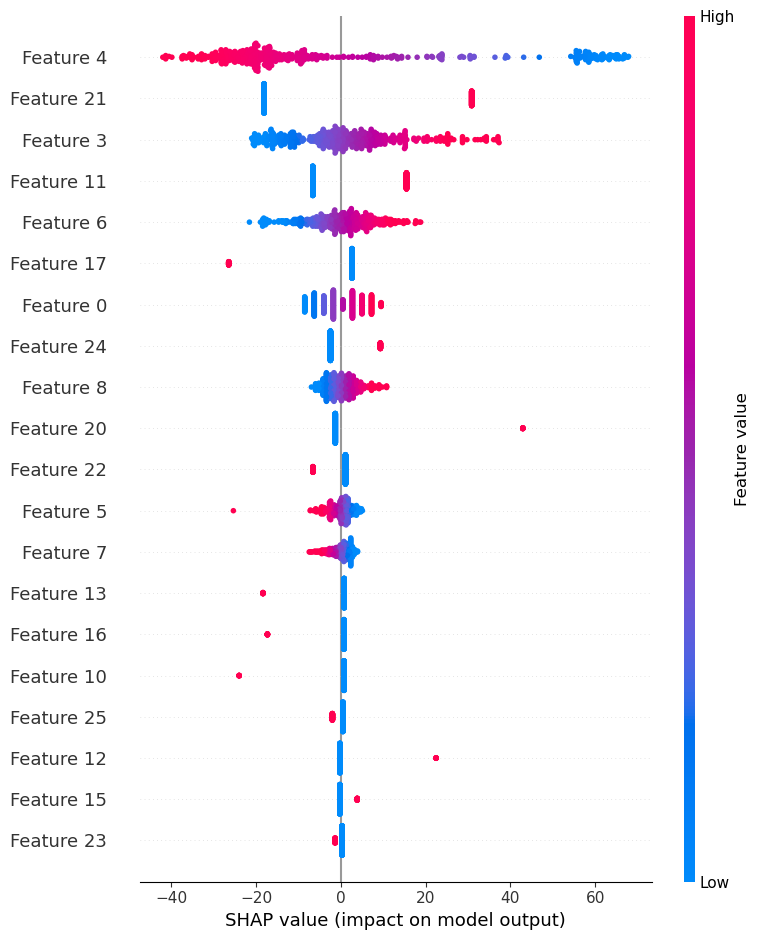

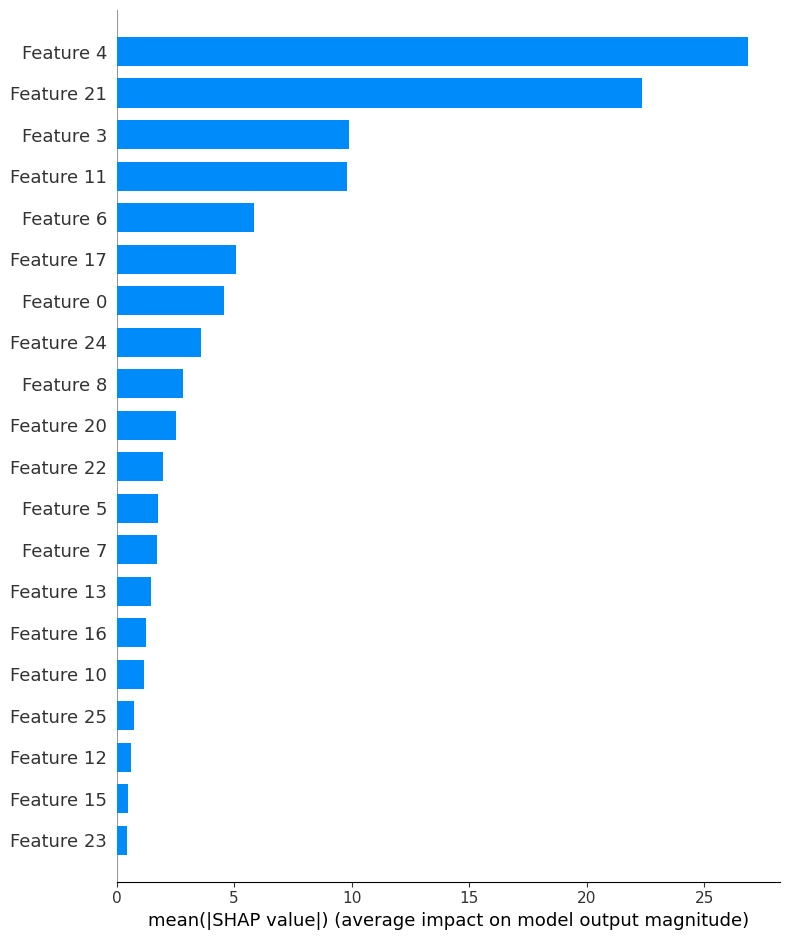

In [17]:
import joblib
import shap
import pandas as pd
import numpy as np

# Load the best model
best_model = joblib.load('best_model.pkl')

# Load the data
data_path = '../../05_src/data/fires/forestfires.csv'
columns = ['coord_x', 'coord_y', 'month', 'day', 'ffmc', 'dmc', 'dc', 'isi', 'temp', 'rh', 'wind', 'rain', 'area']
fires_dt = pd.read_csv(data_path, header=1, names=columns)

X = fires_dt.drop(columns=['area'])
Y = fires_dt['area']

# Create a preprocessor to transform the data
best_preprocessor = best_model.named_steps['preprocessing']

# Transform the data using the preprocessor
X_transformed = best_preprocessor.transform(X)

# Check for NaN values in X_transformed
X_transformed_df = pd.DataFrame(X_transformed)
if X_transformed_df.isnull().values.any():
    print("There are NaN values in the data!")
else:
    print("No NaN values found in the data.")

# Create a SHAP explainer for the regressor
explainer = shap.Explainer(best_model.named_steps['regressor'], X_transformed)
shap_values = explainer(X_transformed)

# Select an observation from the data
observation_index = 0
observation = X_transformed[observation_index]

# Create a SHAP force plot for the selected observation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[observation_index].values, observation)

# Create a SHAP summary plot
shap.summary_plot(shap_values, X_transformed)

# Create a SHAP bar plot for feature importance
shap.summary_plot(shap_values, X_transformed, plot_type="bar")


*(Answer here.)*

#### Explanation:
1. Key Features for a Specific Observation:
For the selected observation (index 0), the most important features were:

Temperature (temp): Increased the prediction the most.

Drought Code (dc): Also contributed positively.
Relative Humidity (rh): Had a negative impact.

2. Important Features Across the Training Set:
The SHAP summary plot showed:

Temperature (temp) and Drought Code (dc) as the most important.

Rain (rain) and Wind (wind) as the least important.

3. Feature Removal and Testing:

To improve the model, consider removing Rain (rain) and Wind (wind). Test this by retraining the model without these features and comparing performance metrics.











## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/production/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.

# Reference

Cortez,Paulo and Morais,Anbal. (2008). Forest Fires. UCI Machine Learning Repository. https://doi.org/10.24432/C5D88D.